In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
import re
color = sns.color_palette()
%matplotlib inline

new_df = pd.read_json("/Users/jakebialer/Neuromancers-Kaggle/price_vs_median30.json")

t_df = pd.read_json("/Users/jakebialer/Neuromancers-Kaggle/train.json")
t_df['description'].value_counts()

t_df.to_json("price_vs_median",force_ascii=False)
print new_df.shape,t_df.shape


(49352, 16) (49352, 15)


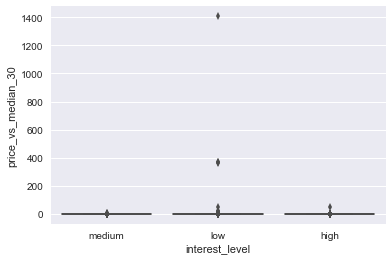

In [22]:
%matplotlib inline

sns.boxplot(x='interest_level', y='price_vs_median_30', data=new_df)


In [4]:
new_df.shape

(3015999, 17)

## No Description 

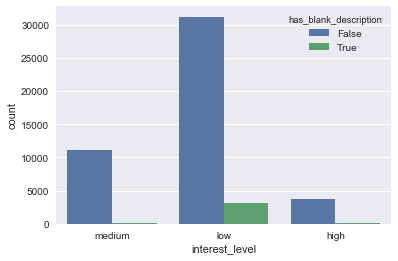

In [2]:
t_df['has_blank_description']= t_df['description'].apply(lambda x: x.strip()) ==""
t_df['has_blank_description'].value_counts()
sns.countplot(x='interest_level',  hue='has_blank_description', data=t_df)


# What are the most common words, bigrams, and trigrams in the description?


In [3]:
t_df.loc[10,'description']
t_df.loc[100004,'description']


u'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by many local cafe?s, restaurants, available for November 1st move in!<br/><br/>To view this apartment or any other please contact me via email or call at the number listed.<br/><br/><br/><br/><br/><br/>Bond New York is a real estate broker that supports equal housing opportunity.<p><a  website_redacted '

In [4]:
no_dups_description=t_df[['description']].drop_duplicates()
no_dups_description

,description
10,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
10000,
100004,"Top Top West Village location, beautiful Pre-w..."
100007,Building Amenities - Garage - Garden - fitness...
100013,Beautifully renovated 3 bedroom flex 4 bedroom...
100016,Stunning unit with a great location and lots o...
100020,"This huge sunny ,plenty of lights 1 bed/2 bath..."
100026,<p><a website_redacted
100027,This is a spacious four bedroom with every bed...
100030,New to the market! Spacious studio located in ...


In [230]:
import string
from nltk import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    return tokens

def find_ngrams(df):
    word_vectorizer = CountVectorizer(ngram_range=(2,4), analyzer='word', stop_words='english',tokenizer=tokenize, max_features=200)
    sparse_matrix = word_vectorizer.fit_transform(df['description'])
    frequencies = sum(sparse_matrix).toarray()[0]
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort('frequency',ascending=[0])


find_ngrams(no_dups_description)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,frequency
br br,48042
br br br,34607
br br br br,24449
stainless steel,12705
pa websiteredacted,12569
br pa websiteredacted,12426
br pa,12426
hardwood floors,10835
steel appliances,10284
stainless steel appliances,10033


# Does the listing have a phone number? 

In [50]:
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = t_df['description'].str.extract(phone_regex)
t_df['has_phone']=[type(item)==unicode for item in has_phone]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [51]:
t_df['has_phone'].value_counts()

False    27125
True     22227
Name: has_phone, dtype: int64

has_phone  interest_level
False      high               7.207373
           low               73.688479
           medium            19.104147
True       high               8.476178
           low               64.318172
           medium            27.205651
Name: interest_level, dtype: float64

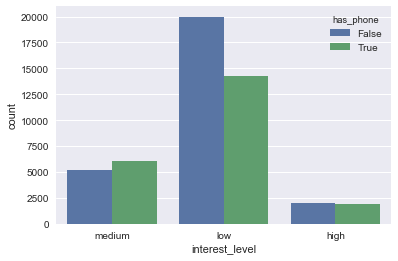

In [22]:
sns.countplot(x='interest_level',  hue='has_phone', data=t_df)
has_phone_interest_level= t_df.groupby(['has_phone','interest_level'])['interest_level'].count()
phone_interest_level_pcts = has_phone_interest_level.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
phone_interest_level_pcts
# If have phone, looks like more likely to have higher interest



In [52]:
t_df['listing_length']=t_df['description'].str.len()

## How is interest level related to listing length?

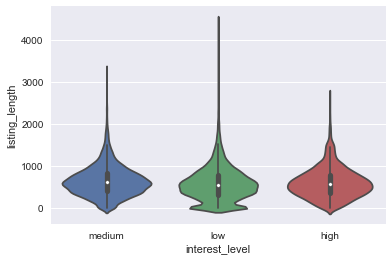

In [53]:
sns.violinplot(x='interest_level',  y='listing_length', data=t_df)


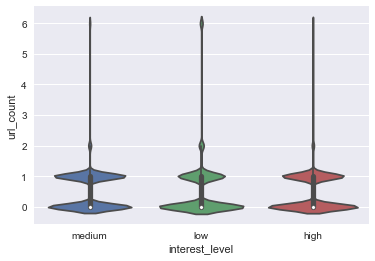

In [55]:
import re 
# http://stackoverflow.com/questions/520031/whats-the-cleanest-way-to-extract-urls-from-a-string-using-python
URL_REGEX = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|edu|org|gov|ly)\b/?(?!@)))"""

def get_urls(text):
    urls = re.findall(URL_REGEX, text)
    return urls

    
    
t_df['url'] = t_df['description'].apply(get_urls)

t_df['url_count'] =t_df['url'] .apply(len)

t_df['url_count'].value_counts()

sns.violinplot(x='interest_level',  y='url_count', data=t_df)


In [60]:
#TODO
# Duplicate
duplicates = t_df.groupby(['description']).size().reset_index().rename(columns={0:'duplicates'}).sort(['duplicates'], ascending=[0])

t_df=pd.merge(t_df, duplicates, left_on='description', right_on='description')







/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


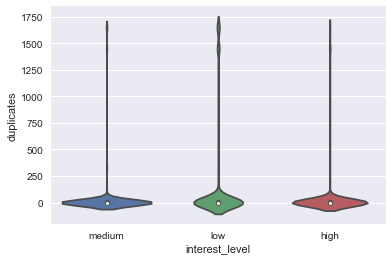

In [61]:
sns.violinplot(x='interest_level',  y='duplicates', data=t_df)


has_guarantors  interest_level
False           high               7.720311
                low               69.566491
                medium            22.713198
True            high               9.575835
                low               66.452442
                medium            23.971722
Name: interest_level, dtype: float64

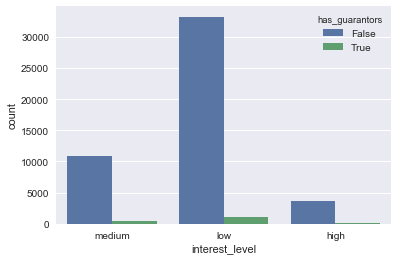

In [64]:
# Guarantors
has_guarantors= t_df['description'].str.contains( "guarantor" ,case=False)
t_df['has_guarantors'] = has_guarantors
sns.countplot(x='interest_level',  hue='has_guarantors', data=t_df)
has_guarantors_interest_level= t_df.groupby(['has_guarantors','interest_level'])['interest_level'].count()
guarantors_interest_level= has_guarantors_interest_level.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
guarantors_interest_level

In [ ]:
# Amount of CAPS 

def count_caps(message):
    caps =sum(1 for c in message if c.isupper())
    total_characters =sum(1 for c in test if c.isalpha())
    if total_characters>0:
        caps = caps/(total_characters* 1.0)
    return caps

t_df['amount_of_caps']=t_df['description'].apply(count_caps)





# Subway Line 
# From brokerage 
# MX id 
# Listing Id 
# Email Address
# Social Media
# has stainless steel
# has hardwood floors
# has broker
# spell check analysis 
# has html tags
# has new
# has free month
# has high celings
# has closet space
# pets
# equal housing

In [76]:
# sentiment analyis
from collections import OrderedDict, defaultdict, Counter
from nltk.tokenize.treebank import TreebankWordTokenizer
import csv
# https://github.com/pmbaumgartner/text-feat-lib/blob/master/notebooks/NRC%20Emotion%20Lexicon%20Features.ipynb
wordList = defaultdict(list)
emotionList = defaultdict(list)
with open('/Users/jakebialer/Desktop/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    headerRows = [i for i in range(0, 46)]
    for row in headerRows:
        next(reader)
    for word, emotion, present in reader:
        if int(present) == 1:
            #print(word)
            wordList[word].append(emotion)
            emotionList[emotion].append(word)



In [77]:
twt = TreebankWordTokenizer()


In [78]:
def generate_emotion_count(string, tokenizer):
    emoCount = Counter()
    for token in twt.tokenize(string):
        token = token.lower()
        emoCount += Counter(wordList[token])
    return emoCount


In [80]:
descriptions = t_df['description'].tolist()
emotionCounts = [generate_emotion_count(description, twt) for description in descriptions]
emotion_df = pd.DataFrame(emotionCounts)
emotion_df = emotion_df.fillna(0)
emotion_df

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0.0,3.0,0.0,0.0,1.0,0.0,8.0,0.0,2.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from textblob import TextBlob


In [87]:
descriptions = t_df['description'].tolist()
descriptions[0]

u"A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted "

In [116]:
# 
from geopy.distance import vincenty
lat = t_df['latitude'].tolist()
long_ = t_df['longitude'].tolist()
midtown_lat = 40.7586
midtown_long = -73.9838
distance =[]
for i in range(len(lat)):
    distance.append(vincenty((lat[i],long[i]),(midtown_lat,midtown_long)).meters)
t_df['distance'] = distance

In [112]:
sorted(distance,reverse=True)

[8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 8665950.242091326,
 3950951.9080433,
 1637870.6130543828,
 1146972.1470792089,
 1039922.8423866157,
 435769.882550251,
 333629.41634407546,
 297143.3073124611,
 297143.3073124611,
 297143.3073124611,
 297143.3073124611,
 296350.0383568093,
 294979.9854694535,
 294979.9854694535,
 294979.9854694535,
 294979.9854694535,
 285390.48182803066,
 285390.48182803066,
 235825.1784410279,
 235818.68296602878,
 156272.2164274674,
 155010.2796929864,
 122534.83518317145,
 92633.94021635702,
 66263.76514356962,
 60042.83064358089,
 52614.127900371444,
 52242.106575034166,
 46273.10357820352,
 46114.26232253581,
 46114.26232253581,
 46114.26232253581,
 38376.75985192803,
 38376.75985192803,
 38376.75985192803,
 34998.24911208024,
 34998.24911208024,
 31663.627984844963,
 27676.19184

In [113]:
t_df['distance'] = distance

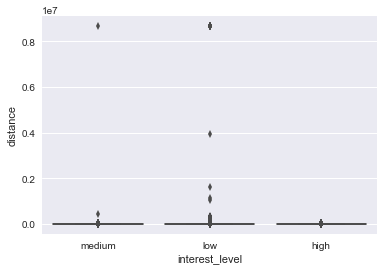

In [118]:
sns.boxplot(x='interest_level',  y='distance', data=t_df)


In [126]:
t_df = t_df[['latitude','longitude','price','bedrooms','bathrooms']]
t_df.shape[0]

49352

In [ ]:
def nearest_neighbors(df,n):
    # Input: df and num of meighbors
    # Output: df with price_vs_median for each row
    df_sub = df[['latitude','longitude','price','bedrooms','bathrooms']]
    rows = range(df.shape[0])
    diffs = map(lambda row: compare_price_vs_median(df_sub,n,row),rows)
    df['price_vs_median_'+str(n)] = diffs
    return df 


def compare_price_vs_median(df,n,i):
    # Help Function For nearest_neighbors
    # for each lat long 
    # calculate dist from all other lat longs with same beds and bathrooms 
    # find n nearest neighbors 
    # calculate median price of n nearest neighbors 
    # compare price vs median 

    print(i)
    row = df.iloc[i,:]
    lat = row['latitude']
    lon = row['longitude']
    bed = row['bedrooms']
    bath = row['bathrooms']
    price = row['price']
    df.index = range(df.shape[0])
    all_other_data = df.drop(df.index[[i]])
    with_same_bed_bath=all_other_data[all_other_data['bedrooms']==bed]
    with_same_bed_bath=with_same_bed_bath[with_same_bed_bath['bathrooms']==bath]
    longs = with_same_bed_bath['longitude'].tolist()
    lats = with_same_bed_bath['latitude'].tolist()
    distances = []
    for j in range(len(lats)):
        distance = vincenty((lats[j],longs[j]),(lat,lon)).meters
        distances.append(distance)
    # http://stackoverflow.com/questions/13070461/get-index-of-the-top-n-values-of-a
    dist_positions= sorted(range(len(distances)), key=lambda k: distances[k])[-n:] 
    top_dist_df= with_same_bed_bath.iloc[dist_positions,:]  
    med_price = with_same_bed_bath['price'].median()
    diff = price/med_price
    return diff

nearest_neighbors(t_df,10)

In [128]:
df = t_df[['latitude','longitude','price','bedrooms','bathrooms']]

In [129]:
rows = t_df.shape[0]

In [130]:
i=range(rows)[0]

In [131]:
row = df.iloc[i,:]

In [132]:
row

latitude       40.7145
longitude     -73.9425
price        3000.0000
bedrooms        3.0000
bathrooms       1.5000
Name: 10, dtype: float64

In [135]:
lat = row['latitude']
lon = row['longitude']
bed = row['bedrooms']
bath = row['bathrooms']
price = row['bathrooms']

In [134]:
lat

40.714500000000001

In [136]:
all_other_data = df.iloc[-i,:]

In [177]:
with_same_bed_bath=all_other_data[all_other_data['bedrooms']==bed and all_other_data['bathrooms']==bath]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [145]:
with_same_bed_bath

-73.942499999999995

In [146]:
all_other_data

latitude       40.7145
longitude     -73.9425
price        3000.0000
bedrooms        3.0000
bathrooms       1.5000
Name: 10, dtype: float64

In [147]:
all_other_data = df.iloc[-i,:]

In [150]:
all_other_data = df.ix[df.iloc[i,:],]

In [151]:
all_other_data

,latitude,longitude,price,bedrooms,bathrooms
40.7145,NaN,NaN,NaN,NaN,NaN
-73.9425,NaN,NaN,NaN,NaN,NaN
3000.0000,40.7665,-73.985,3300.0,2.0,1.0
3.0000,NaN,NaN,NaN,NaN,NaN
1.5000,NaN,NaN,NaN,NaN,NaN


In [157]:
df.index = range(df.shape[0])
df

,latitude,longitude,price,bedrooms,bathrooms
0,40.7145,-73.9425,3000,3,1.5
1,40.7947,-73.9667,5465,2,1.0
2,40.7388,-74.0018,2850,1,1.0
3,40.7539,-73.9677,3275,1,1.0
4,40.8241,-73.9493,3350,4,1.0
5,40.7429,-74.0028,7995,4,2.0
6,40.8012,-73.9660,3600,2,1.0
7,40.7427,-73.9957,5645,1,2.0
8,40.8234,-73.9457,1725,1,1.0
9,40.7278,-73.9808,5800,4,2.0


In [158]:
all_other_data = df.drop(df.index[[i]])

In [159]:
all_other_data

,latitude,longitude,price,bedrooms,bathrooms
1,40.7947,-73.9667,5465,2,1.0
2,40.7388,-74.0018,2850,1,1.0
3,40.7539,-73.9677,3275,1,1.0
4,40.8241,-73.9493,3350,4,1.0
5,40.7429,-74.0028,7995,4,2.0
6,40.8012,-73.9660,3600,2,1.0
7,40.7427,-73.9957,5645,1,2.0
8,40.8234,-73.9457,1725,1,1.0
9,40.7278,-73.9808,5800,4,2.0
10,40.7769,-73.9467,1950,0,1.0


In [176]:
with_same_bed_bath=all_other_data.loc[all_other_data['bedrooms']==bed]

In [164]:
all_other_data['bedrooms']==bed
all_other_data['bathrooms']==bath


1.5

numpy.float64

In [173]:
type(all_other_data['bedrooms'])

pandas.core.series.Series

In [179]:
 with_same_bed_bath=all_other_data[all_other_data['bedrooms']==bed]

In [180]:
with_same_bed_bath=with_same_bed_bath[with_same_bed_bath['bathrooms']==bath]

In [181]:
longs = with_same_bed_bath['longitude'].tolist()

In [182]:
lats = with_same_bed_bath['latitude'].tolist()

In [183]:
        distances = []

In [184]:
lats

[40.753,
 40.7436,
 40.6923,
 40.8362,
 40.8257,
 40.7282,
 40.7376,
 40.7449,
 40.6947,
 40.7233,
 40.656,
 40.753,
 40.8226,
 40.7693,
 40.7022,
 40.8362,
 40.7304,
 40.7865,
 40.7122,
 40.6996,
 40.7187,
 40.7458,
 40.6903,
 40.6825,
 40.7025,
 40.7656,
 40.7488,
 40.7025,
 40.7157,
 40.6999,
 40.7782,
 40.7561,
 40.7195,
 40.7304,
 40.7318,
 40.7304,
 40.7113,
 40.7842,
 40.7413,
 40.7165,
 40.6781,
 40.7436,
 40.7469,
 40.6883,
 40.7637,
 40.7862,
 40.7864,
 40.691,
 40.755,
 40.7413,
 40.7411,
 40.753,
 40.693,
 40.7228,
 40.7548,
 40.7436,
 40.7637,
 40.6383,
 40.7436,
 40.6872,
 40.7895,
 40.7413,
 40.7863,
 40.7391,
 40.6924,
 40.6388,
 40.6619,
 40.6825,
 40.7662,
 40.7436,
 40.7084,
 40.7191,
 40.7642,
 40.7488,
 40.7539,
 40.7413,
 40.7561,
 40.617,
 40.7617,
 40.7436,
 40.7486,
 40.8226,
 40.5915,
 40.7449,
 40.7842,
 40.7426,
 40.7862,
 40.7205,
 40.7465,
 40.7418,
 40.693,
 40.78,
 40.7864,
 40.7595,
 40.7862,
 40.705,
 40.7426,
 40.7436,
 40.7859,
 40.7864,
 40.714,
 40

In [188]:
distances=[]
for j in range(len(lats)):
    distance = vincenty((lats[j],longs[j]),(lat,lon)).meters
    distances.append(distance)
distances

[6215.031165192142,
 4117.234665330392,
 4015.120716693396,
 13517.780085307802,
 12376.38764974803,
 6041.303131176805,
 3819.7133127047414,
 4498.778292769336,
 2217.449249435436,
 4500.930547359373,
 6544.716190574892,
 6208.902874442387,
 12035.293865908317,
 6148.55127663471,
 2768.756700786285,
 13517.780085307802,
 5567.827166967999,
 7995.605724522379,
 2909.5352832879576,
 2617.477755424218,
 4435.205571386135,
 10238.475020520775,
 2830.0844747456367,
 3737.424628050773,
 2834.162012537485,
 6974.1321492978595,
 4617.5631430225885,
 2834.162012537485,
 167.44792099356414,
 2366.551334516364,
 7084.482252984134,
 4963.797485545349,
 7161.301696658818,
 5567.827166967999,
 4259.703837219299,
 5567.827166967999,
 1357.0886575629208,
 7754.044691240693,
 4231.102463302487,
 7371.390056548491,
 4131.306239442252,
 4117.234665330392,
 4662.344149688761,
 3083.9437188159914,
 6636.464789413676,
 7962.223908770832,
 7984.500845639514,
 2655.26743556511,
 4837.774277594466,
 4231.1024

In [189]:
n=25

In [190]:
dist_positions= sorted(range(len(distances)), key=lambda k: distances[k])[-n:] 

In [191]:
dist_positions

[113,
 98,
 152,
 57,
 60,
 65,
 108,
 161,
 176,
 160,
 200,
 21,
 106,
 133,
 115,
 12,
 81,
 4,
 77,
 3,
 15,
 182,
 191,
 82,
 196]

In [192]:
top_dist_df= with_same_bed_bath.iloc[dist_positions,:] 

In [193]:
top_dist_df

,latitude,longitude,price,bedrooms,bathrooms
26658,40.7865,-73.9420,2700,3,1.5
22964,40.7859,-73.9755,4600,3,1.5
37852,40.7870,-73.9749,4950,3,1.5
14052,40.6383,-73.9537,2175,3,1.5
14824,40.7895,-73.9753,4995,3,1.5
15683,40.6388,-73.9794,3800,3,1.5
24879,40.7943,-73.9675,4925,3,1.5
39865,40.7972,-73.9486,3395,3,1.5
42911,40.7972,-73.9486,3260,3,1.5
39611,40.7967,-73.9623,3995,3,1.5


In [194]:
med_price = with_same_bed_bath['price'].median()

In [195]:
med_price

4340.0

In [197]:
diff

0.0003456221198156682

In [199]:
price = row['price']

In [201]:
diff = price/med_price

In [202]:
diff

0.69124423963133641

In [210]:
t_df['price'].describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [211]:
count_nan = len(t_df['price']) - t_df['price'].count()

In [212]:
count_nan


0